![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


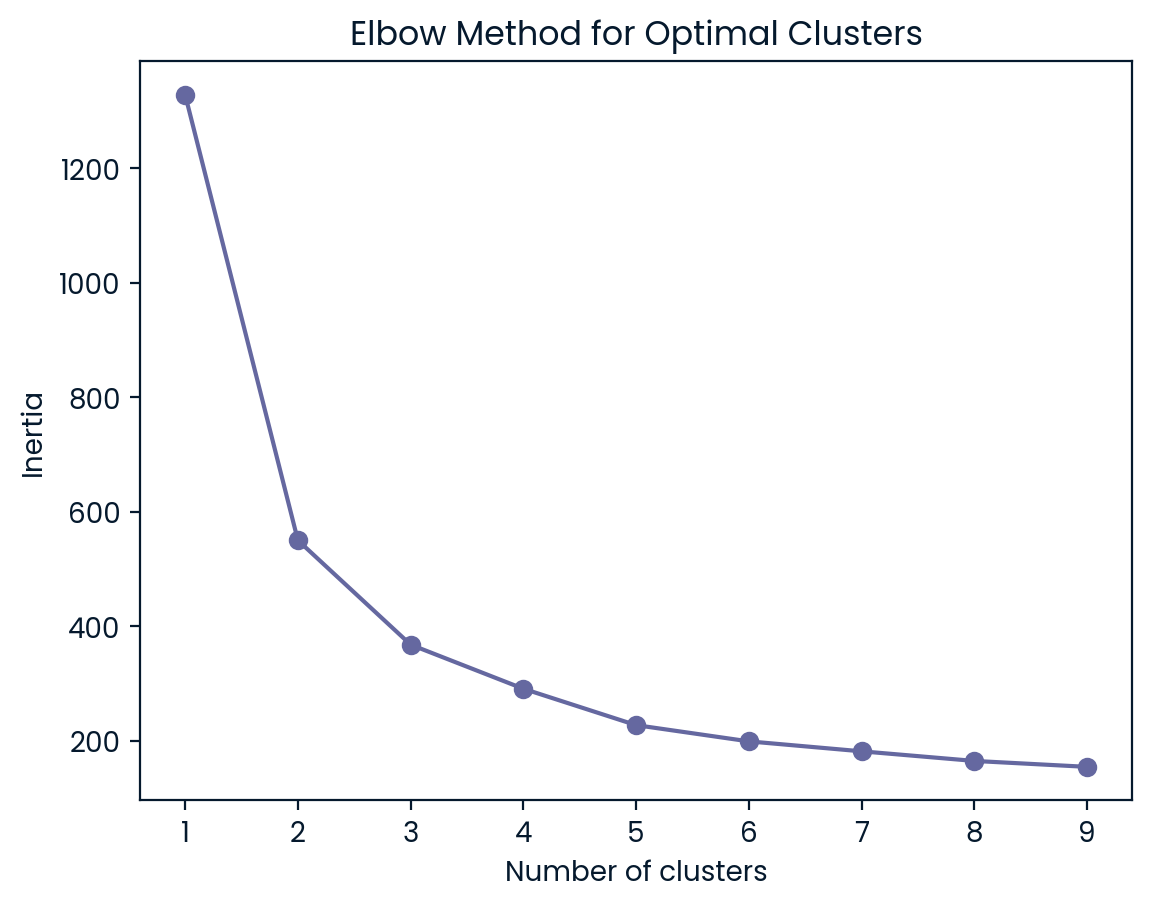

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               38.305469        18.098437         188.554688  3587.500000
1               49.792982        15.738596         221.912281  5519.736842
2               47.662353        18.748235         196.917647  3898.235294
3               45.522581        14.314516         212.935484  4699.596774


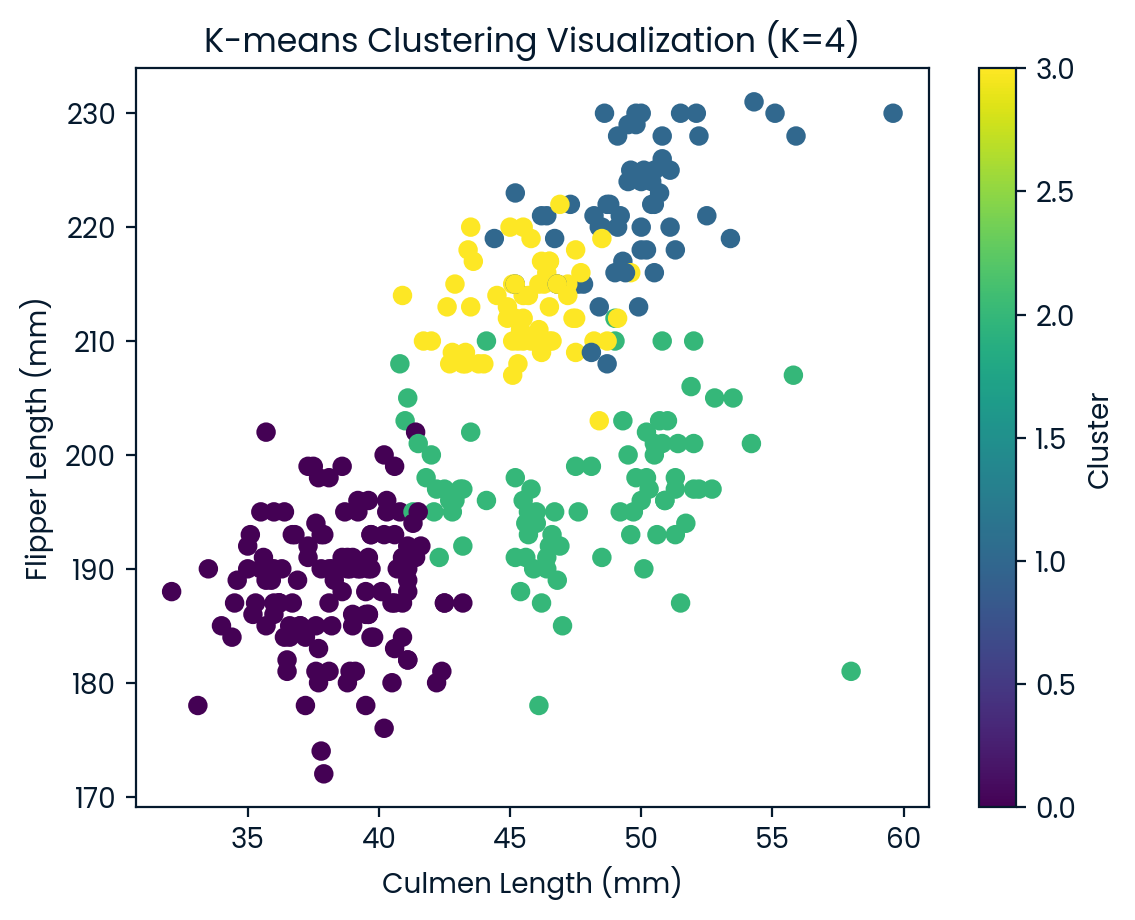

In [2]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and examine the dataset
penguins_df = pd.read_csv("penguins.csv")
print(penguins_df.head())
print(penguins_df.info())

# Drop non-numeric columns and handle missing data
# Exclude 'species' or other categorical columns from clustering and drop any rows with missing data
penguins_df_cleaned = penguins_df.dropna()  # Remove rows with missing data
penguins_numeric = penguins_df_cleaned.select_dtypes(include=['float64', 'int64'])  # Select numeric columns only

# Standardize the numeric data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_numeric)

# Detect the optimal number of clusters using the Elbow method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# From the plot, choose the optimal number of clusters
optimal_clusters = 4  # Based on visual inspection of the elbow curve

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
penguins_df_cleaned['cluster'] = kmeans.fit_predict(penguins_scaled)

# Calculate and display the mean values for each cluster
# Group the original numeric columns by cluster and calculate mean values
stat_penguins = penguins_df_cleaned.groupby('cluster').mean()

# Display the results
print(stat_penguins)

# Visualize clustering based on some features (e.g., culmen_length_mm vs flipper_length_mm)
plt.scatter(penguins_df_cleaned['culmen_length_mm'], penguins_df_cleaned['flipper_length_mm'], 
            c=penguins_df_cleaned['cluster'], cmap='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title(f'K-means Clustering Visualization (K={optimal_clusters})')
plt.colorbar(label='Cluster')
plt.show()